In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [147]:
Transformed_Housing_Data = pd.read_csv('Transformed_Housing_Data.csv')

In [148]:
Transformed_Housing_Data['Sale Price'].corr(Transformed_Housing_Data['Flat Area (in Sqft)'])

0.6951704258420675

In [149]:
np.corrcoef(Transformed_Housing_Data['Sale Price'], Transformed_Housing_Data['Flat Area (in Sqft)'])

array([[1.        , 0.69517043],
       [0.69517043, 1.        ]])

In [150]:
Transformed_Housing_Data.drop(columns = ['ID']).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606527,0.307513,-0.064306,-0.043047,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.152760,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,-0.203951,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,-0.199380,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.129551,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,-0.059222,0.049692,0.125620,0.280106,-0.011204,-0.000901
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.084830,0.006162,-0.078453,0.280452,0.072561,0.093546
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,-0.185844,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.261124,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.074933,0.110451,-0.144822,0.200302,0.017263,0.029158


In [151]:
Transformed_Housing_Data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot: xlabel='Condition of the House'>

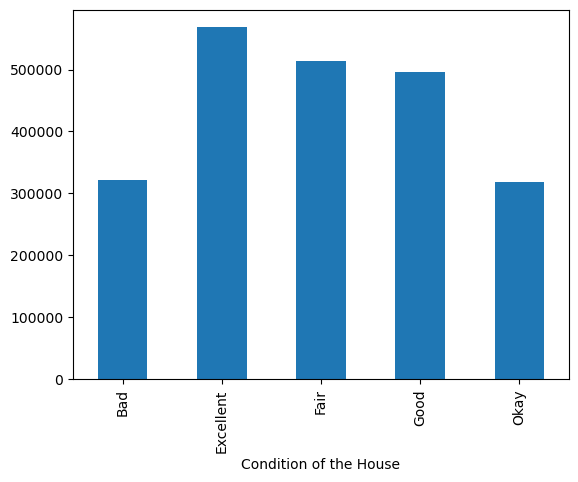

In [152]:
Transformed_Housing_Data.groupby('Condition of the House',
                                )['Sale Price'].mean().plot(kind = 'bar')

<AxesSubplot: xlabel='Condition of the House'>

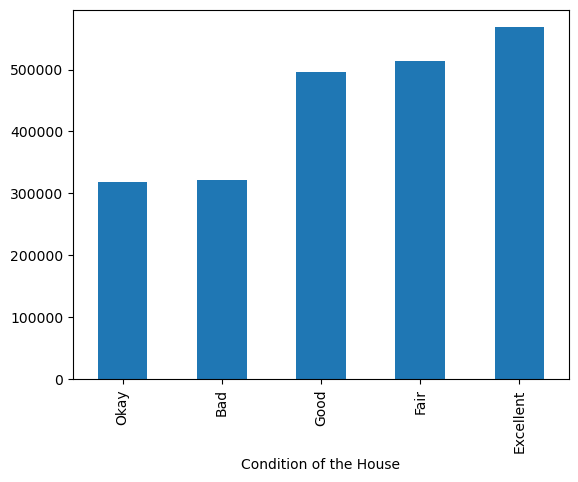

In [153]:
Transformed_Housing_Data.groupby('Condition of the House',
                                )['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot: xlabel='Waterfront View'>

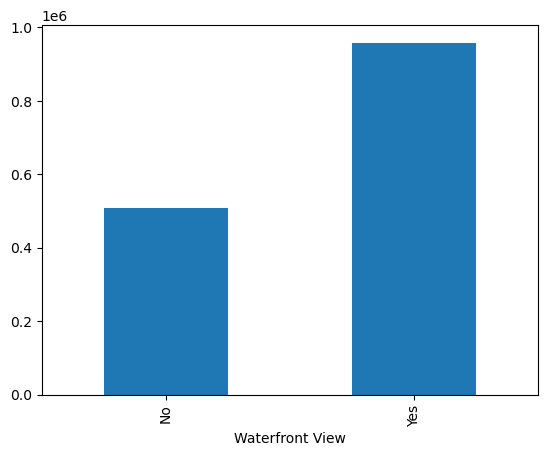

In [154]:
Transformed_Housing_Data.groupby('Waterfront View',
                                )['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot: xlabel='Ever Renovated'>

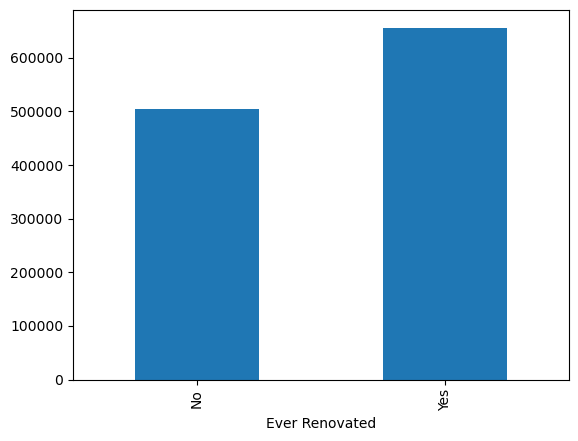

In [155]:
Transformed_Housing_Data.groupby('Ever Renovated',
                                )['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot: xlabel='Zipcode'>

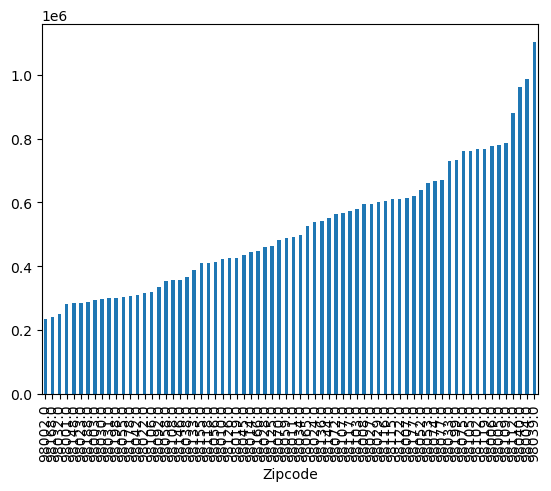

In [156]:
Transformed_Housing_Data.groupby('Zipcode',
                                )['Sale Price'].mean().sort_values().plot(kind = 'bar')

In [157]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [158]:
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns = {'Sale Price' : 'Sale_Price'})
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns = {'Condition of the House' : 'Condition_of_the_House'})
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns = {'Ever Renovated' : 'Ever_Renovated'})
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns = {'Waterfront View' : 'Waterfront_View'})

In [159]:
Transformed_Housing_Data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Year Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [160]:
Transformed_Housing_Data['Waterfront_View'].unique()

array(['No', 'Yes'], dtype=object)

In [161]:
mod = ols('Sale_Price ~ Condition_of_the_House',
         data = Transformed_Housing_Data).fit()

In [162]:
Anova_Table = sm.stats.anova_lm(mod, typ = 2)

In [163]:
print(Anova_Table)

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


In [164]:
mod = ols('Sale_Price ~ Ever_Renovated',
          data = Transformed_Housing_Data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [165]:
mod = ols('Sale_Price ~ Waterfront_View',
         data = Transformed_Housing_Data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [166]:
mod = ols('Sale_Price ~ Zipcode',
         data = Transformed_Housing_Data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Zipcode,2.503765e+12,1.0,40.112844,2.444308e-10
Residual,1.348666e+15,21607.0,NaN,NaN


In [167]:
#Above all follows alternate hypothesis

In [168]:
Transformed_Housing_Data = pd.get_dummies(Transformed_Housing_Data, columns = ['Condition_of_the_House'], drop_first = True)

In [169]:
Transformed_Housing_Data.head(10)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Overall Grade,...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,...,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,...,47.7210,-122.319,1690.0,7639,Yes,26,0,1,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,...,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,...,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,...,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0
5,7237550310,1129575.0,4,4.50,5420.0,101930.0,1.0,No,0,10,...,47.6561,-122.005,4760.0,101930,No,0,0,1,0,0
6,1321400060,257500.0,3,2.25,1715.0,6819.0,2.0,No,0,7,...,47.3097,-122.327,2238.0,6819,No,0,0,1,0,0
7,2008000270,291850.0,3,1.50,1060.0,9711.0,1.0,No,0,7,...,47.4095,-122.315,1650.0,9711,No,0,0,1,0,0
8,2414600126,229500.0,3,1.00,1780.0,7470.0,1.0,No,0,7,...,47.5123,-122.337,1780.0,8113,No,0,0,1,0,0
9,3793500160,323000.0,3,2.50,1890.0,6560.0,2.0,No,0,7,...,47.3684,-122.031,2390.0,7570,No,0,0,1,0,0


In [170]:
Transformed_Housing_Data = pd.get_dummies(Transformed_Housing_Data, columns = ['Ever_Renovated', 'Waterfront_View'], drop_first = True)

In [171]:
Transformed_Housing_Data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,-122.319,1690.0,7639,26,0,1,0,0,1,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


In [172]:
Zip_Table = Transformed_Housing_Data.groupby('Zipcode').agg({'Sale_Price' : 'mean'}).sort_values('Sale_Price', ascending = True)

In [173]:
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [174]:
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale_Price'], bins = 10, labels = ['Zipcode_Group_0',
                                                                                 'Zipcode_Group_1',
                                                                                 'Zipcode_Group_2',
                                                                                 'Zipcode_Group_3',
                                                                                 'Zipcode_Group_4',
                                                                                 'Zipcode_Group_5',
                                                                                 'Zipcode_Group_6',
                                                                                 'Zipcode_Group_7',
                                                                                 'Zipcode_Group_8',
                                                                                 'Zipcode_Group_9',],
                                   include_lowest = True)

In [175]:
Zip_Table

,Sale_Price,Zipcode_Group
Zipcode,,
98002.0,2.342840e+05,Zipcode_Group_0
98168.0,2.403284e+05,Zipcode_Group_0
98032.0,2.512962e+05,Zipcode_Group_0
98001.0,2.808047e+05,Zipcode_Group_0
98148.0,2.849086e+05,Zipcode_Group_0
...,...,...
98109.0,7.876028e+05,Zipcode_Group_6
98112.0,8.807990e+05,Zipcode_Group_7
98040.0,9.621087e+05,Zipcode_Group_8


In [176]:
Zip_Table = Zip_Table.drop(columns = 'Sale_Price')

In [177]:
Transformed_Housing_Data = pd.merge(Transformed_Housing_Data,
                                   Zip_Table,
                                   left_on = 'Zipcode',
                                   how = 'left',
                                   right_index = True)

In [178]:
Transformed_Housing_Data = Transformed_Housing_Data.drop(columns = 'Zipcode')
Transformed_Housing_Data.head(10)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1690.0,7639,26,0,1,0,0,1,0,Zipcode_Group_2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group_2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Group_3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Group_4
5,7237550310,1129575.0,4,4.50,5420.0,101930.0,1.0,0,10,3890.0,...,4760.0,101930,0,0,1,0,0,0,0,Zipcode_Group_4
6,1321400060,257500.0,3,2.25,1715.0,6819.0,2.0,0,7,1715.0,...,2238.0,6819,0,0,1,0,0,0,0,Zipcode_Group_0
7,2008000270,291850.0,3,1.50,1060.0,9711.0,1.0,0,7,1060.0,...,1650.0,9711,0,0,1,0,0,0,0,Zipcode_Group_0
8,2414600126,229500.0,3,1.00,1780.0,7470.0,1.0,0,7,1050.0,...,1780.0,8113,0,0,1,0,0,0,0,Zipcode_Group_1
9,3793500160,323000.0,3,2.50,1890.0,6560.0,2.0,0,7,1890.0,...,2390.0,7570,0,0,1,0,0,0,0,Zipcode_Group_1


In [179]:
Transformed_Housing_Data = pd.get_dummies(Transformed_Housing_Data,
                                         columns = ['Zipcode_Group'],
                                         drop_first = True)
Transformed_Housing_Data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


In [180]:
Transformed_Housing_Data = Transformed_Housing_Data.drop(columns = 'ID')

In [181]:
Transformed_Housing_Data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [183]:
Transformed_Housing_Data.to_csv('Transformed_Housing_Data2.csv', index = False)